In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["MKL_NUM_THREADS"] = "4"

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
traindata = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(traindata, batch_size=4, shuffle=True, num_workers=2)

testdata = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testdata, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)

for epoch in range(20):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))


Accuracy: 32 %


In [4]:
# Class wise accuracy

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 45 %
Accuracy of   car : 51 %
Accuracy of  bird :  1 %
Accuracy of   cat :  2 %
Accuracy of  deer :  6 %
Accuracy of   dog : 36 %
Accuracy of  frog : 70 %
Accuracy of horse : 42 %
Accuracy of  ship : 24 %
Accuracy of truck : 44 %


[1.8023297538614274, 1.7750132148742677, 1.75340335231781, 1.7338893839645386, 1.7163384019231795, 1.6975744302320481, 1.6799356524896623, 1.6612767442798615, 1.6426113918685914, 1.6238345438861848, 1.6057543339681626, 1.5893942174744606, 1.574595586462021, 1.5601899522995948, 1.5474601112651825, 1.5360127938580512, 1.5237209501361846, 1.5121198535394669, 1.501150409772396, 1.4897561836862565]
[10.799070443558692, 10.637779388332367, 10.508806329488754, 10.392715673851967, 10.286702152049541, 10.17459487632513, 10.067753491449356, 9.955320865166188, 9.842579279112815, 9.729872756159306, 9.621759905958175, 9.523730105233193, 9.434825832283497, 9.349099523639678, 9.272549288368225, 9.20242927417755, 9.12832522906065, 9.058409850513936, 8.991853768241405, 8.924035250294208]


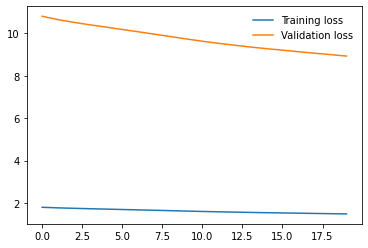

In [5]:
# Calculate training and validation loss vs epoch
train_loss = []
valid_loss = []
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(trainloader))

    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    valid_loss.append(running_loss / len(testloader))

print(train_loss)
print(valid_loss)

# Plot training and validation loss vs epoch
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend(frameon=False)